# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# # To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# To get diferent metric scores
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
    classification_report,
    make_scorer
)

## Reading in the data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folderpath="/content/drive/MyDrive/data_skills_showcase/customer_predictions_machine_learning/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading in the data and making a copy of it to work.
sourceData = pd.read_csv(folderpath + "ExtraaLearn.csv")
df = sourceData.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
#checking the shape and basic info of the data
df.shape

(4612, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# Checking for null values
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [7]:
df.isnull().values.any()

np.False_

In [8]:
# Observing a few sample rows from the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [9]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [10]:
# Verifying that our unique identifier is unique.  4612 unique values = # of rows in the data so yes.
df['ID'].value_counts()

,count
ID,
EXT4612,1
EXT001,1
EXT002,1
EXT003,1
EXT4596,1
...,...
EXT009,1
EXT008,1
EXT007,1


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [11]:
# take a look at summary statistics of the numeric data
df.describe().T
#Looks like about 30% of leads convert (status = 1)

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [12]:
# Making a list of all catrgorical variables and checking the counts of each value
catagories = list(df.select_dtypes("object").columns)
catagories.remove('ID') #ID is a unique identifier we don't needs stats on

# Printing number of count of each unique value in each column
for column in catagories:
    print("~" * 25) #padding
    print(df[column].value_counts())
print("~" * 25) #padding

~~~~~~~~~~~~~~~~~~~~~~~~~
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
digital_media
No     4085
Yes     527
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
educational_channels
No     3907
Yes     705
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~
referral
No     4519
Yes      93
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~


# Analysis of numeric data fields

In [13]:
#Choosing a color palette for graphing
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [14]:
print(colors.as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [15]:
pasGreen = '#66c2a5'
pasOrange = '#fc8d62'
pasBlue = '#8da0cb'

In [16]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    plotFigure, (plotBox, plotHist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among both subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=plotBox, showmeans=True, color=pasOrange)  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=plotHist, bins=bins, color=pasBlue) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=plotHist, color=pasBlue)  # For histogram
    plotHist.axvline(data[feature].mean(), color=pasGreen, linestyle="--") # Add mean to the histogram
    plotHist.axvline(data[feature].median(), color="black", linestyle="-") # Add median to the histogram

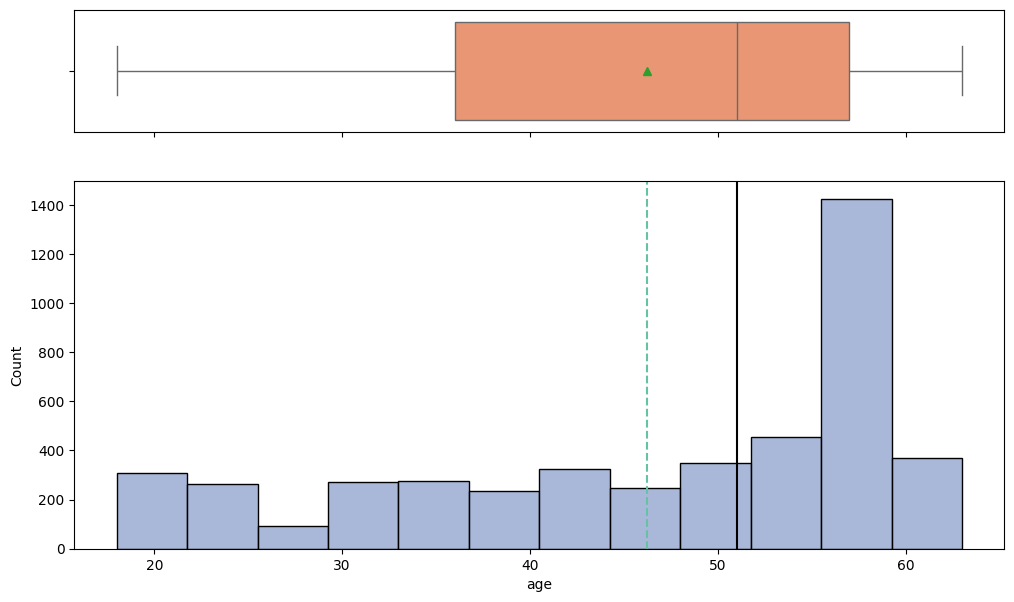

In [17]:
#Plots of Age.  Skews a bit high into the 50-60 age bracket
histogram_boxplot(df, "age", bins=12)

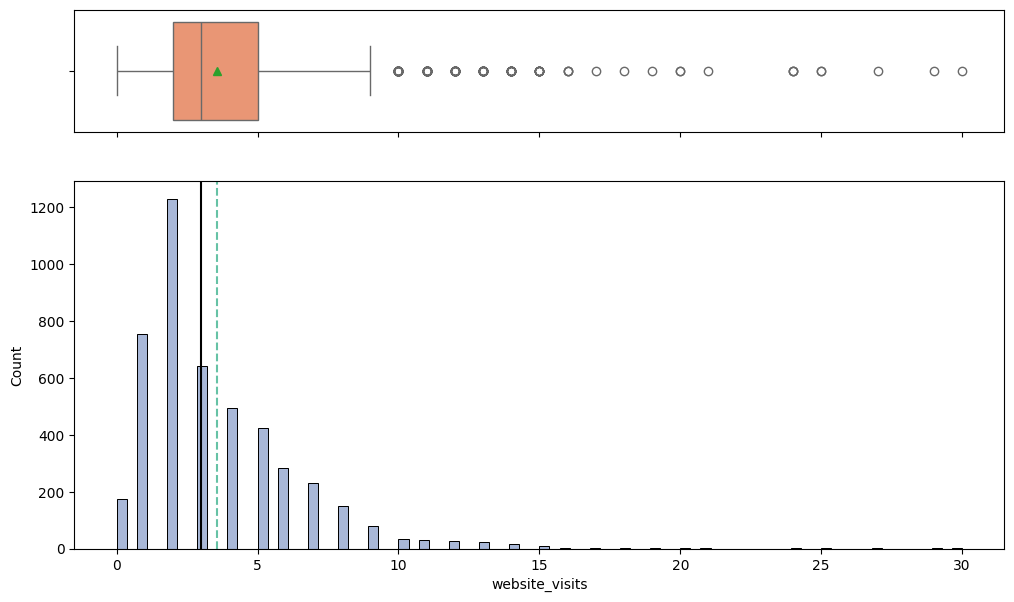

In [18]:
#Plot of website_visits.  Most only visit a couple times.
histogram_boxplot(df, "website_visits")

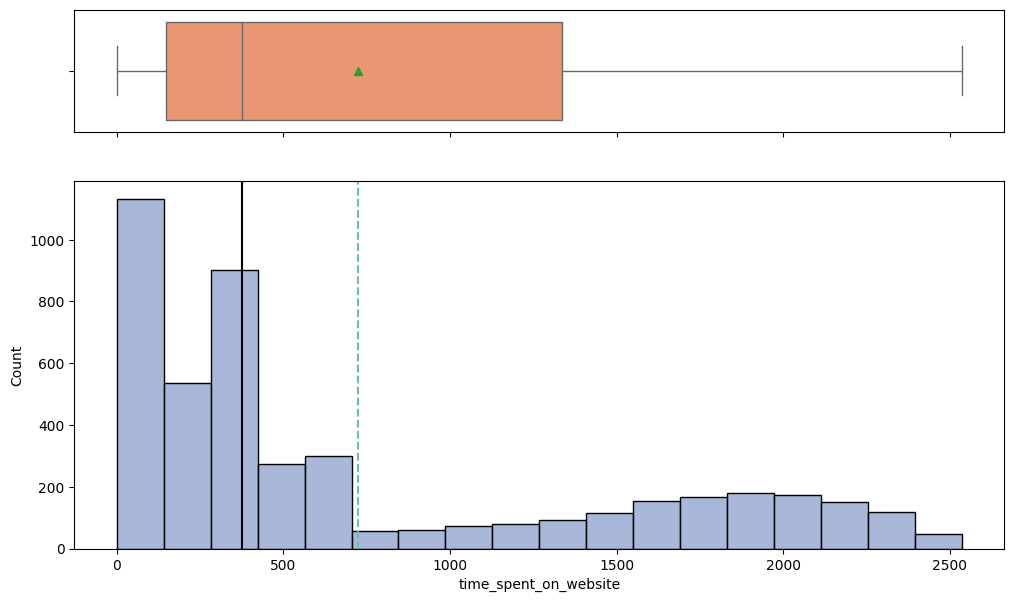

In [19]:
# Plot of time spent on website in seconds.  Most people are spending ~10 minutes or less
histogram_boxplot(df, "time_spent_on_website")

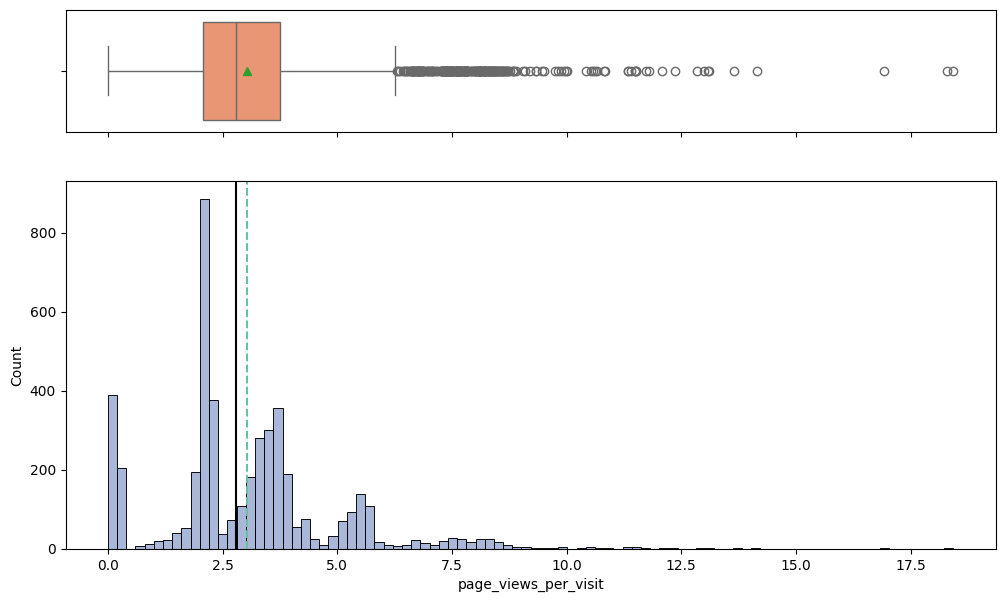

In [20]:
#Plot of page_views_per_visit.  Seems people are not exploring the website deeply past the homepage.
histogram_boxplot(df, "page_views_per_visit")

# Analysis of catagorical data fields

In [21]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if count == 2: #keeping a consistant color scheme for catagorical values
      colorcode = {'Yes': pasGreen, 1: pasGreen,  'Website': pasGreen,
                    'No': pasOrange, 0: pasOrange, 'Mobile App': pasOrange}
    else:
      colorcode = "Set2"

    plt.figure(figsize=(count + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data = data,
        x = feature,
        hue = feature,
        palette = colorcode,
        order = data[feature].value_counts().index[:], #.sort_values() #sort alphabetically rather than by counts
        legend = False
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



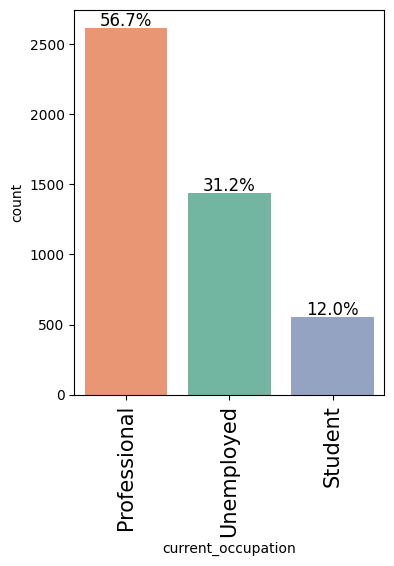

In [22]:
labeled_barplot(df, "current_occupation", perc=True)

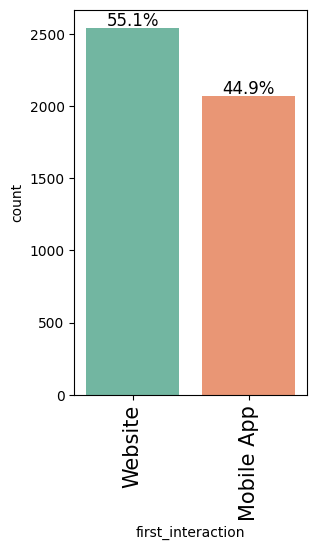

In [23]:
labeled_barplot(df, "first_interaction", perc=True)

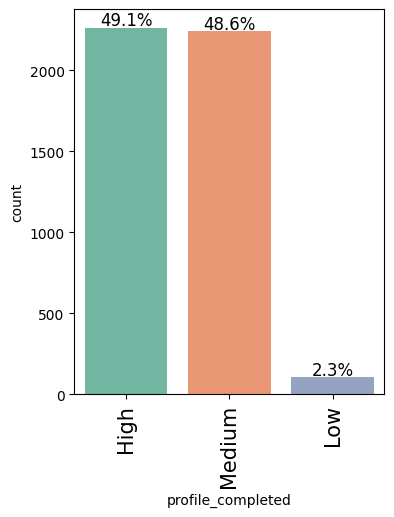

In [24]:
labeled_barplot(df, "profile_completed", perc=True)

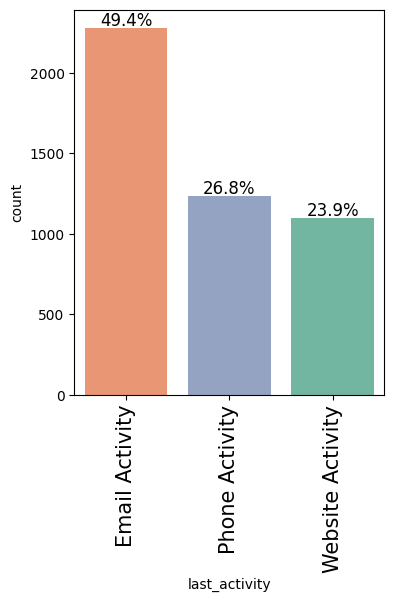

In [25]:
labeled_barplot(df, "last_activity", perc=True)

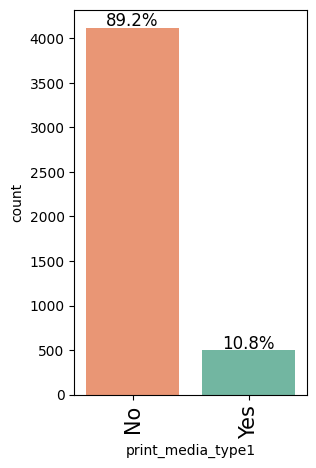

In [26]:
labeled_barplot(df, "print_media_type1", perc=True)

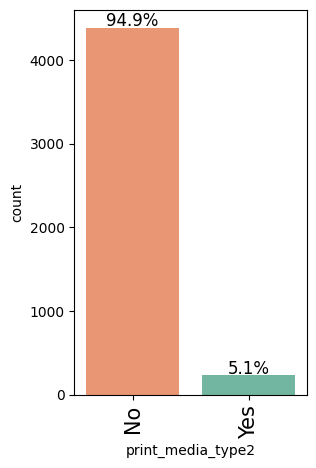

In [27]:
labeled_barplot(df, "print_media_type2", perc=True)

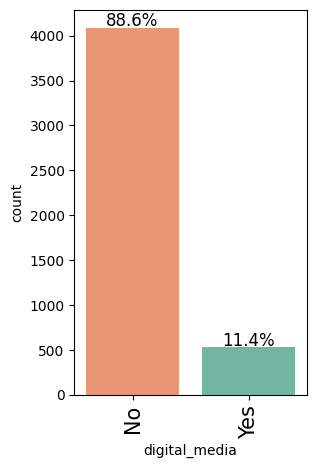

In [28]:
labeled_barplot(df, "digital_media", perc=True)

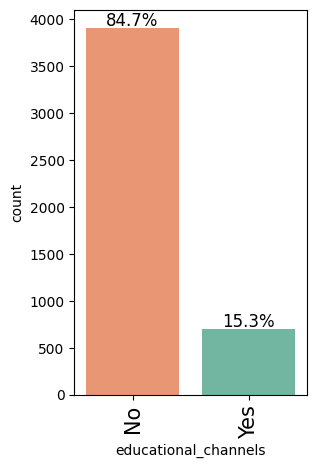

In [29]:
labeled_barplot(df, "educational_channels", perc=True)

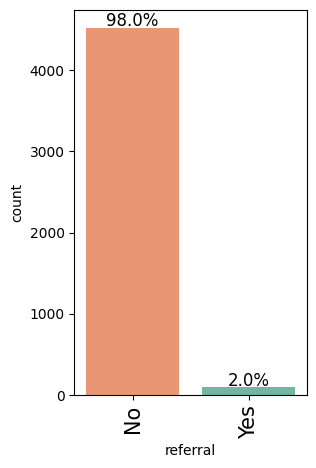

In [30]:
labeled_barplot(df, "referral", perc=True)

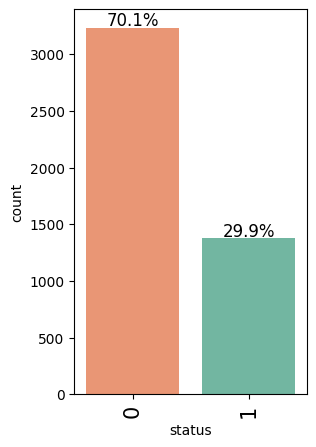

In [31]:
labeled_barplot(df, "status", perc=True)

### Bivariate Analysis

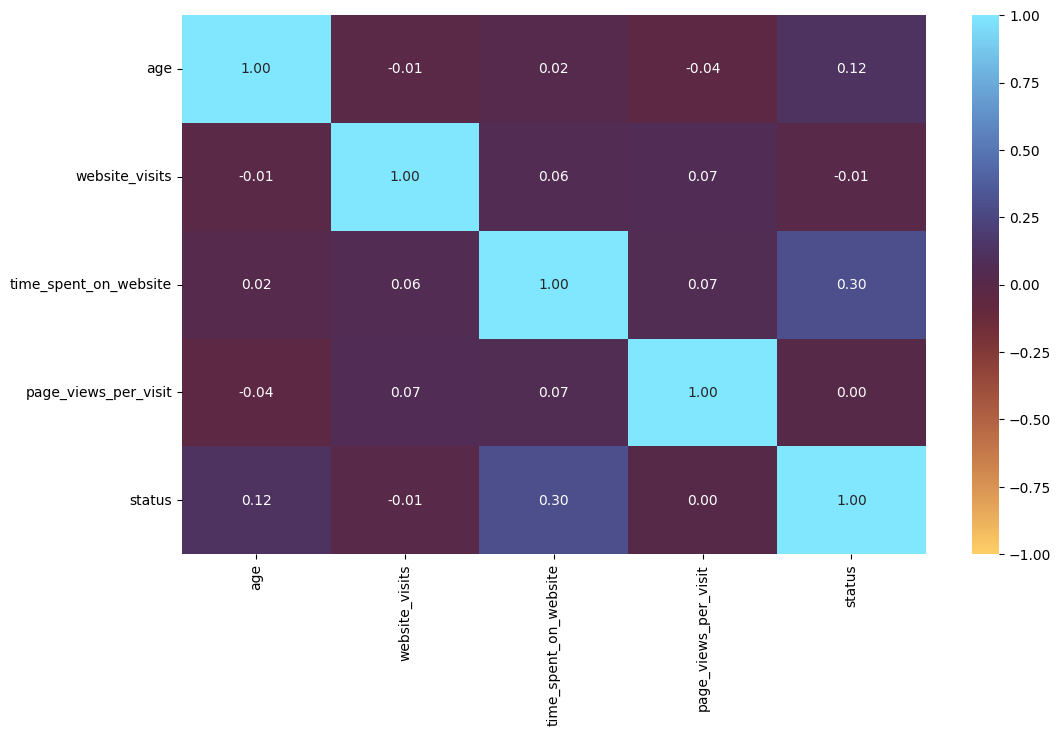

In [32]:
#We can see from this heatmap that the numeric fields with the strogest correlation to status are 'time_spent_on_website' and 'age' but even those are incredibly strong relationships
column_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[column_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="managua")
plt.show()

In [33]:
### function to plot {predictor} distributions with respect to {target}

def distribution_plot(data, predictor, target):
    """
    Prints the distribution plots and historgrams showing the relationship between the {predictor} field and {target} field
    data: dataframe
    predictor: independent variable
    target: target variable
    """

    figure, axs = plt.subplots(2, 2, figsize=(11, 9))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f"Distribution of {predictor} when {target} = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=pasGreen,
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {predictor} when {target} = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=pasOrange,
        stat="density",
    )

    colorcode = {1: pasGreen, 0: pasOrange}

    axs[1, 0].set_title(f"Boxplot of {predictor} & {target}")
    sns.boxplot(
        data=data,
        x=target,
        hue=target,
        y=predictor,
        ax=axs[1, 0],
        palette=colorcode,
        legend=False
    )

    axs[1, 1].set_title(f"Boxplot (without outliers) of {predictor} & {target}")
    sns.boxplot(
        data=data,
        x=target,
        hue=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette=colorcode,
        legend=False
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color = (pasOrange,pasGreen))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

(How does current_occupation affect lead status?)

In [35]:
df['current_occupation'].unique()

array(['Unemployed', 'Professional', 'Student'], dtype=object)

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


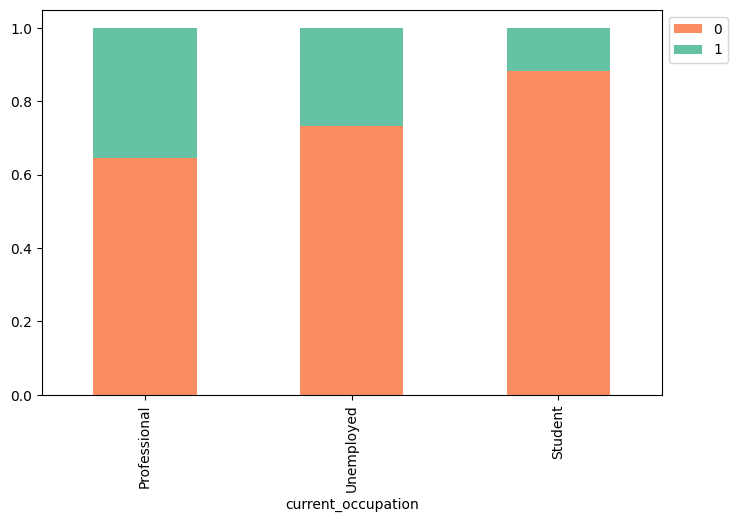

In [36]:
# It looks as though students may be less interested in taking the course we're offering (Probably because they are currently enrolled in school already)
stacked_barplot(df, "current_occupation", "status")

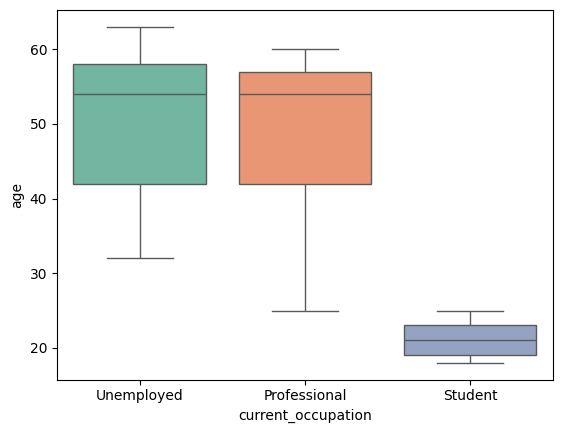

<Figure size 1000x500 with 0 Axes>

In [37]:
# If we do an analysis of our current occupation by age we can see that nearly all students are under 30. Which suggests that the most likely audience for our program is seasoned professionals.
sns.boxplot(x="current_occupation", y="age", data=df, palette= 'Set2', hue='current_occupation')
plt.figure(figsize=(10, 5))
plt.show()

In [38]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


### Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
(How does the first channel of interaction (first_interaction) impact the lead status?)

In [39]:
df['first_interaction'].unique()

array(['Website', 'Mobile App'], dtype=object)

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


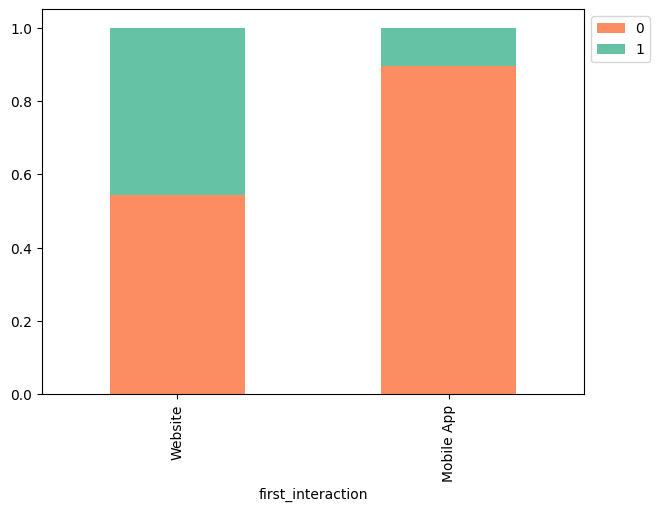

In [40]:
# Looks like there is a higher conversion rate based on website visits compared to mobile app use
stacked_barplot(df, "first_interaction", "status")

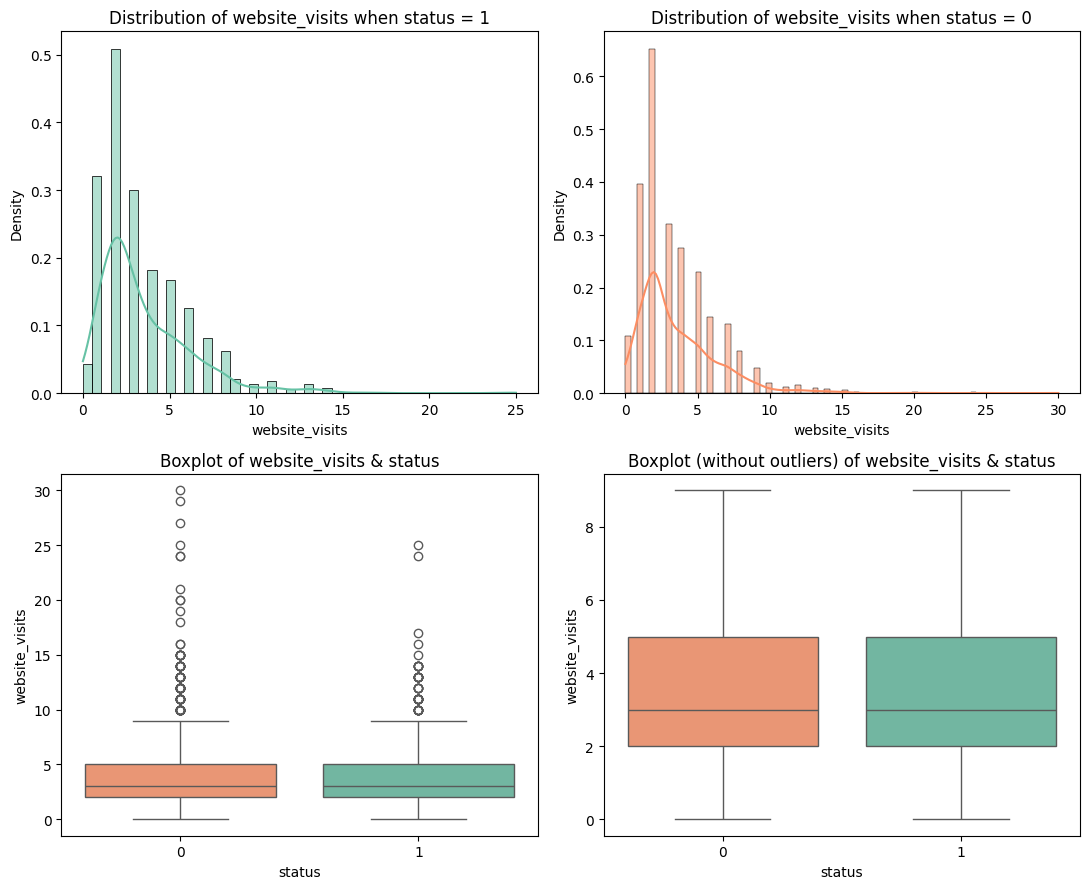

In [41]:
# That said, it doesn't look like the average website visits is much different between leads that did and did not convert.
distribution_plot(df, 'website_visits', 'status')

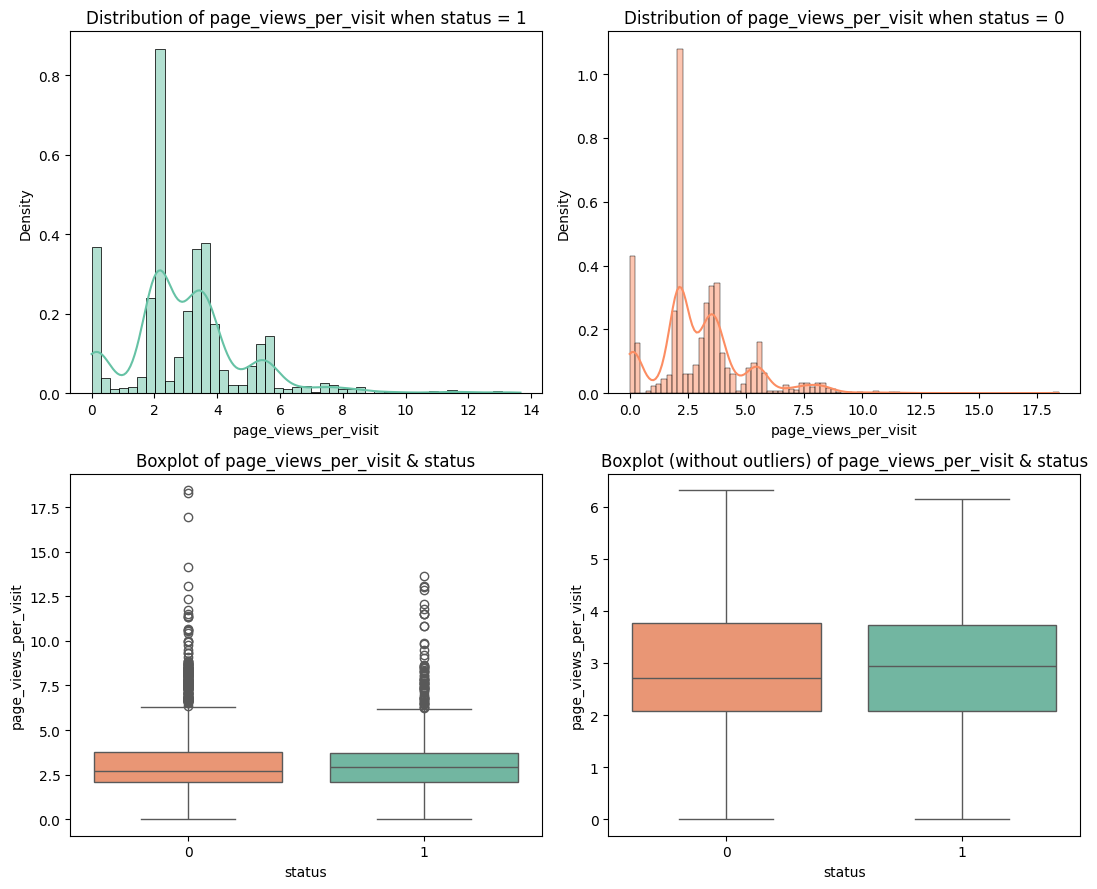

In [42]:
distribution_plot(df, 'page_views_per_visit', 'status')

### Question 3: The company uses multiple modes to interact with prospects. Which way of interaction works best?
(Analysis of last_activity)

In [43]:
# 3rd Question
# Which mode of interaction works best? (last_activity)
df['last_activity'].unique()

array(['Website Activity', 'Email Activity', 'Phone Activity'],
      dtype=object)

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


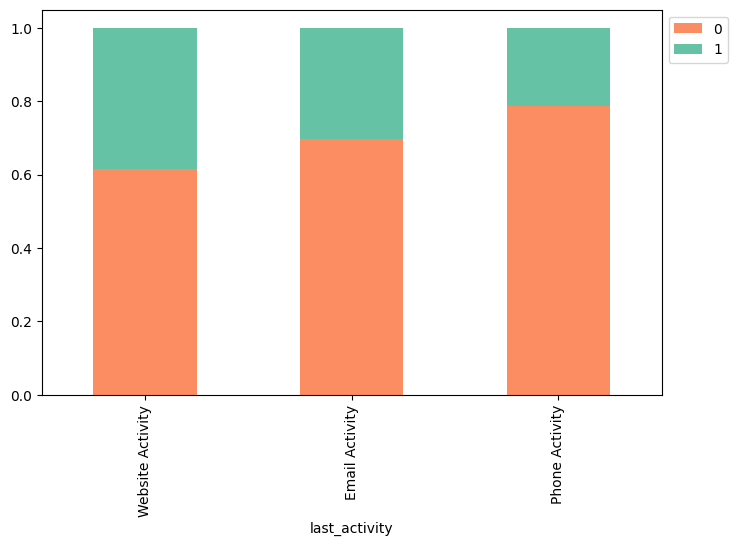

In [44]:
# Website activity appears to have a bit higher conversion rate than email and phone actitiy.
stacked_barplot(df, 'last_activity', 'status')

### Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

Which channels of communication are most effective at converting leads?  
(print_media_type1, print_media_type1, digital_media, educational_channels, referral)

In [45]:
#Verify all values of the channel fields are yes/no
pd.concat([df['print_media_type1'], df['print_media_type2'], df['digital_media'], df['educational_channels'], df['referral']]).unique()

array(['Yes', 'No'], dtype=object)

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


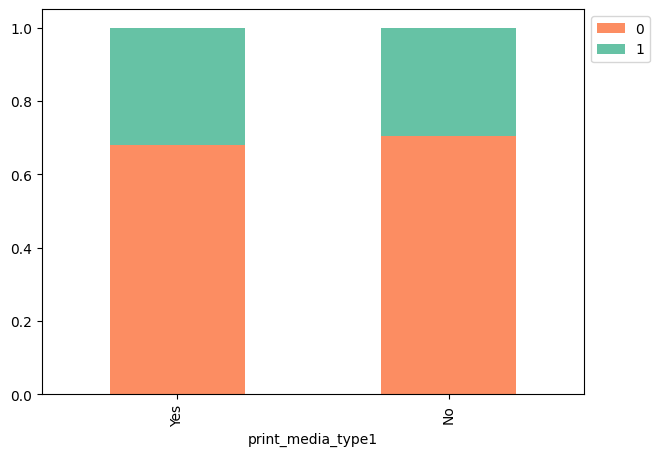

In [46]:
# print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
# There appears to be little difference in conversion rate based on if any of the leads have interacted with ads a specific form of media.  Both from the perspective of little difference between the forms of ads and little difference between conversion success.
stacked_barplot(df, 'print_media_type1', 'status')

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


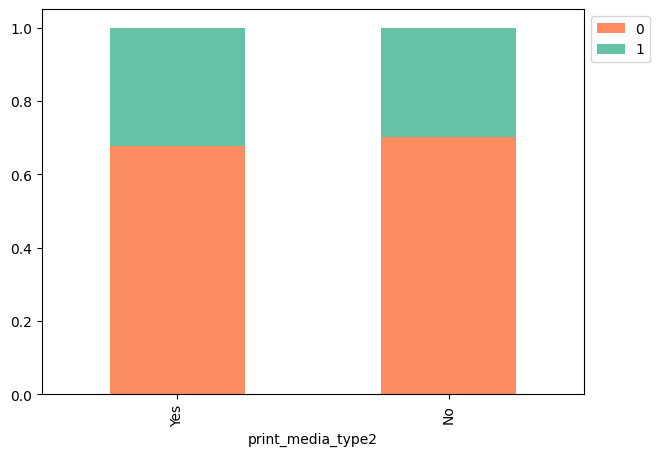

In [47]:
# print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
stacked_barplot(df, 'print_media_type2', 'status')

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


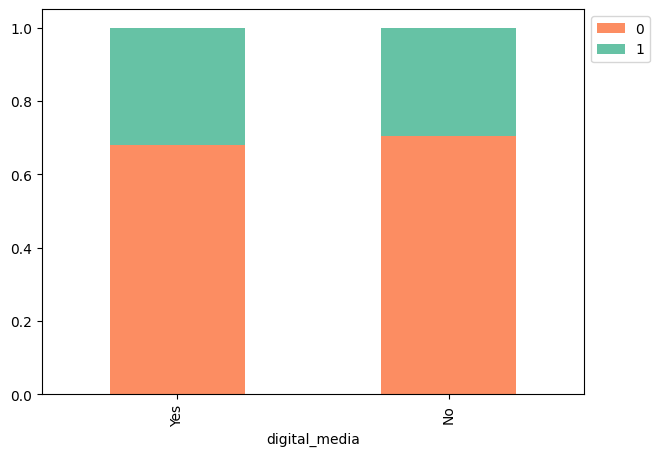

In [48]:
# digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
stacked_barplot(df, 'digital_media', 'status')

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


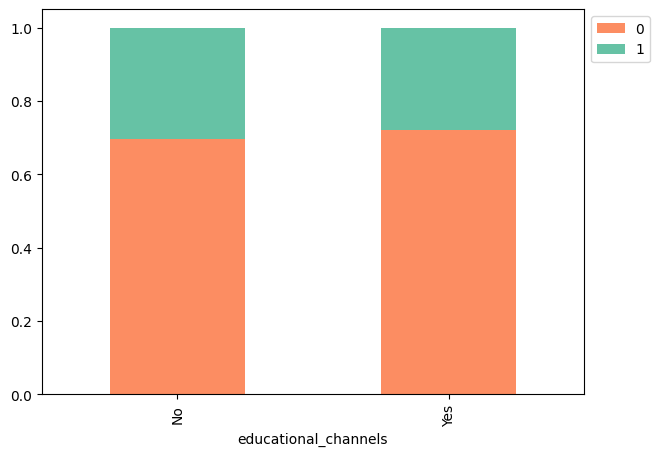

In [49]:
# educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
# This is the only mode of contact where those who did not interact with the channel had a higher conversion rate than those that did.  But by a very thin margin.
stacked_barplot(df, 'educational_channels', 'status')

### Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?
(Does having a more completed profile increase the likelyhood of conversion?)

In [50]:
df['profile_completed'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


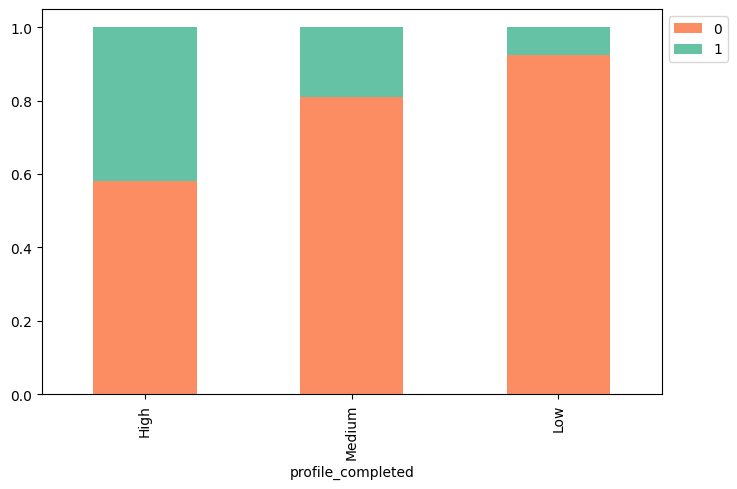

In [51]:
# Not too surprising but we do see indications that leads who are more commited to filling out their profile are following through with the program enrolling in the program at a higher rate than those who do not.
stacked_barplot(df, 'profile_completed', 'status')

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Outlier detection using Boxplots

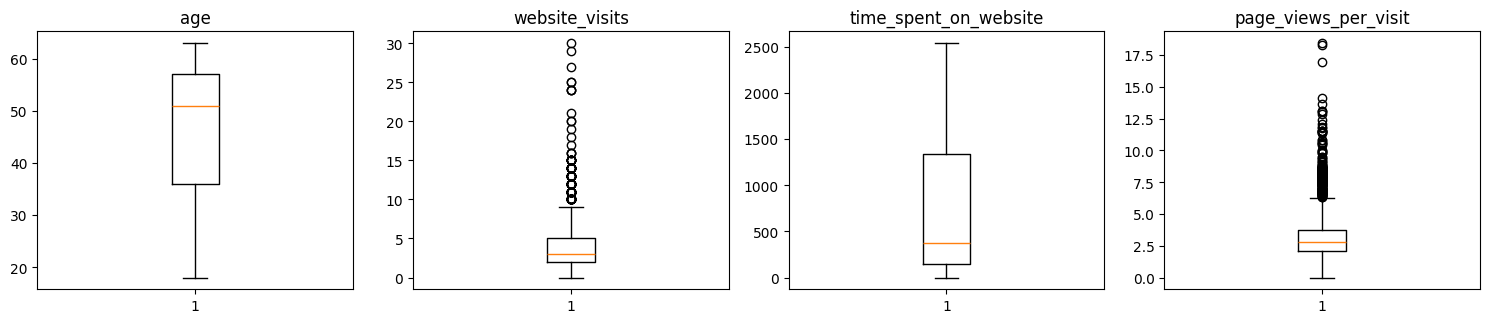

In [52]:
# As we've seen in our previous graphs there are some outlier in the website_visits and page_views_per_visit catagories.
# These are both features that (if you refer to our heatmap show virtually no correlation with status so I don't feel we need to do anything to account for them in our model.
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping status as it is a boolean value
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Preparing data for modeling.

In [53]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [54]:
#Quick reminder that we already checked for null values and found none in our dataset.
df.isnull().values.any()

np.False_

In [55]:
# Droping 'status' and 'ID' when assigning our data to new data frame X.
# Dropping status because it is our target variable and ID because it's an unnecessary identifier and adds no value to our analysis.
X = df.drop(['status', 'ID'], axis=1)
Y = df['status']

# One hot Encoding our catagorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [56]:
print("Shape of Training set : ", X_train.shape) # (rows, columns)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


In [57]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,True,False,True,False,False,False,False,False,False,False,False,False


# Model evaluation criterion:

### Our models can make wrong predictions such as predicting a lead will convert to a paying customer when they wouldn't (a Type 1 error/false positive) or by incorrectly predicting that a lead that would convert to a paying customer if pursued would not convert. (A type 2 error/false negative).

### It would be worse for us to miss out on potential customers by failing to follow up than it would be to pursue a lead that will not enevitably convert so we want to reduce this loss and occurance of Type 2 errors by maximizing Recall and minimizing our false negatives

## Building a Decision Tree model

In [58]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [59]:
# Fitting the decision tree classifier on the training data
dt_model = tree.DecisionTreeClassifier(random_state=1)
dt_fitted = dt_model.fit(X_train, y_train)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



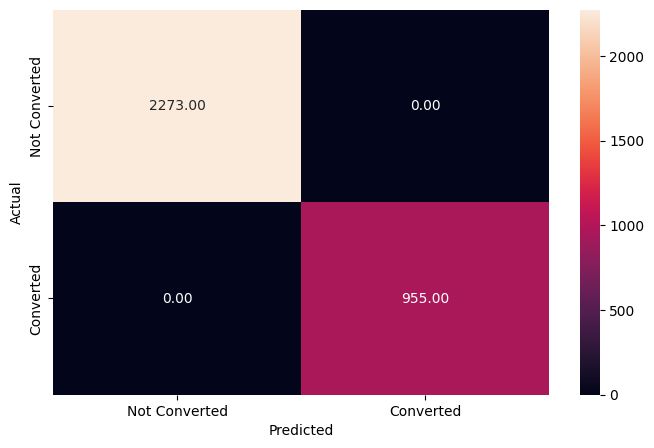

In [60]:
# Checking performance on the training data
y_pred_train1 = dt_fitted.predict(X_train)
metrics_score(y_train, y_pred_train1)

# Our model performed perfectly on the training data.
# Our precision & recall were both 1.0. The model must be flawless!

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



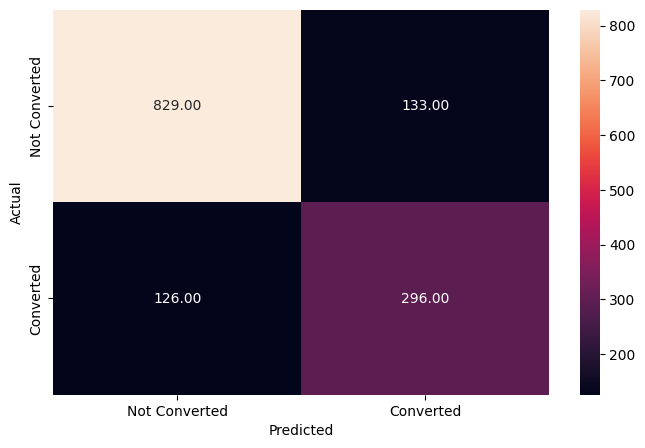

In [61]:
# Checking performance on the test data
y_pred_test1 = dt_fitted.predict(X_test)
metrics_score(y_test, y_pred_test1)

# Our model performed noticeably worse on the actual test data.  Not terrible but considering the evaulation was literally perfect on the test data this is likely due to overfitting.
# Maybe it's not as flawless as expected.  We can run it a few more times with various maximum depths to try and find the right place to stop training.

### **Decision Tree - Hyperparameter Tuning using GridSearchCV**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [62]:
# Choose the type of classifier
dt_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})
# Grid of parameters to choose from
dt_parameters = {'max_depth': np.arange(2, 10), # Try a variety of max depths between 2 and 10
              'criterion': ['gini', 'entropy'], # Trying various criteria
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, dt_parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=1)

In [63]:
#The paramters used in our tuned classifier (as seen in the previous cell output)
grid_obj.best_params_

{'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 5}

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



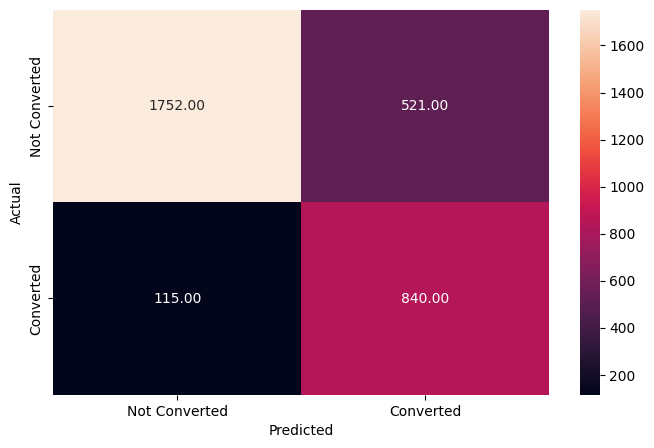

In [64]:
# Checking performance on the 2nd model on training data
y_pred_train2 = dt_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

# This doesn't look as ideal as our previous confusion matrix training data (because that one was overfitted)
# but if it posts similar results on the test data that would be an indicator that we stopped training at the ideal time and using the correct parameters.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



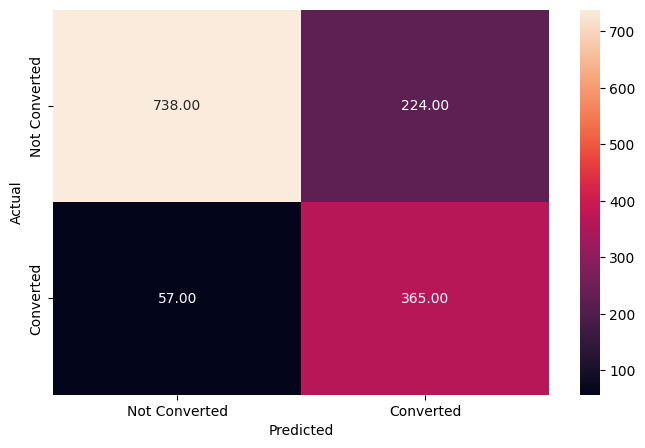

In [65]:
# Checking performance on the 2nd model on test data
y_pred_test2 = dt_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

# This is a good improvement from our initial model.  The results on the test data more closely match the results from the training data and there has been a noteworth improvement in the recall of our 1 values for status
# This is a .16 point improvement from 0.70 to 0.86.  This shows we are properly tuning our model in order to reduce the loss of leads likely to convert to paying customers.

## Model Performance evaluation and improvement

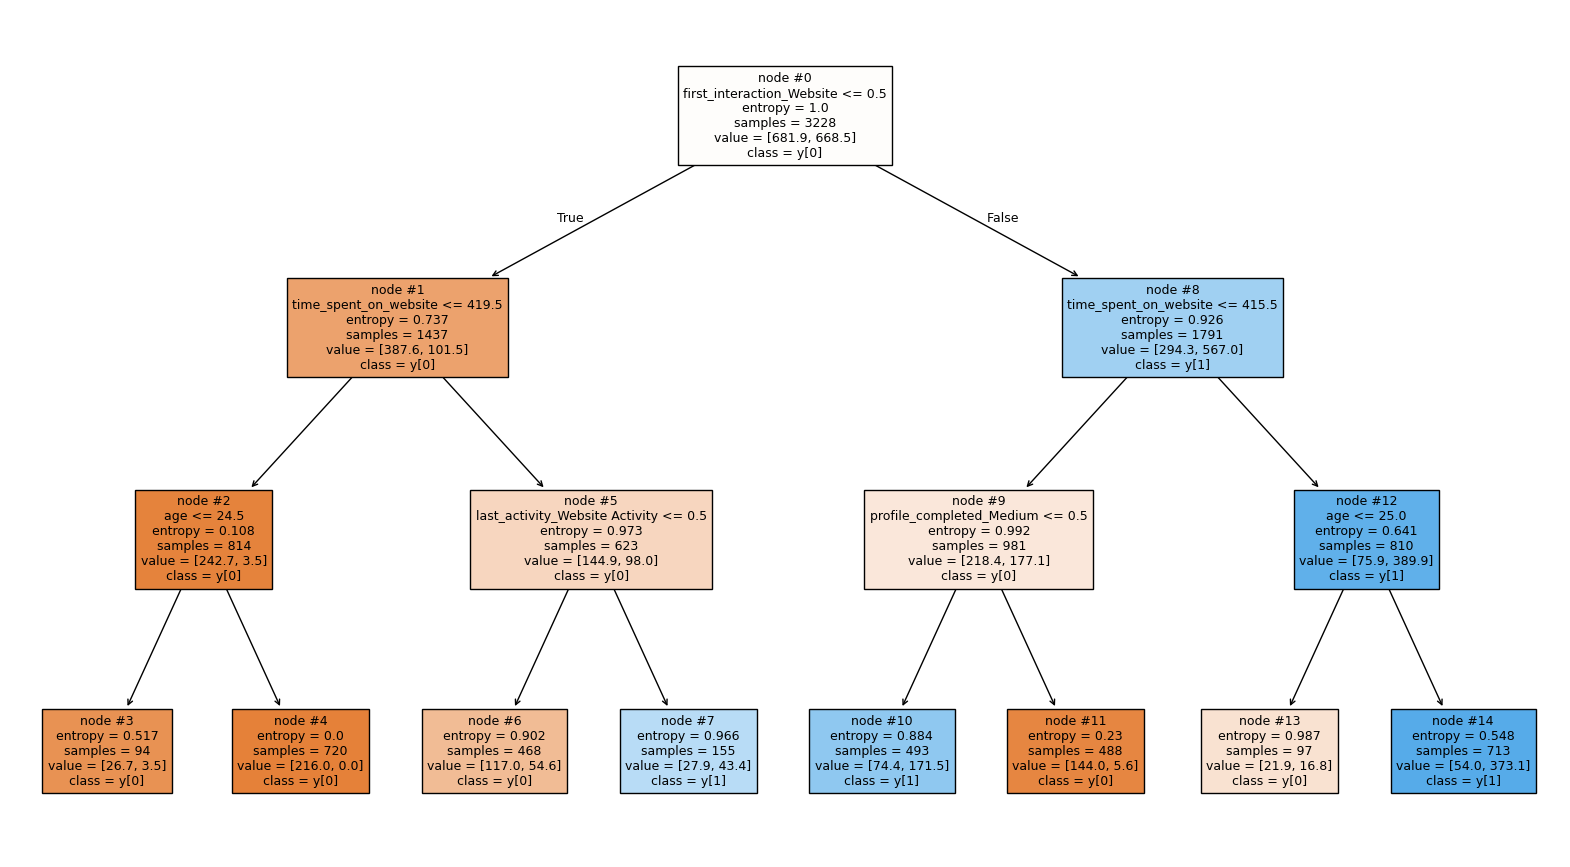

In [66]:
# We can see from the following graphs that our most important features for predicting status are time_spent_on_website, first_interaction, and profile_completed
# Age and last_activity also have some importance in our decision tree

features = list(X.columns)
plt.figure(figsize = (20, 11))
tree.plot_tree(dt_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [67]:
print (pd.DataFrame(dt_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
current_occupation_Student     0.00000
page_views_per_visit           0.00000
website_visits                 0.00000
profile_completed_Low          0.00000
current_occupation_Unemployed  0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


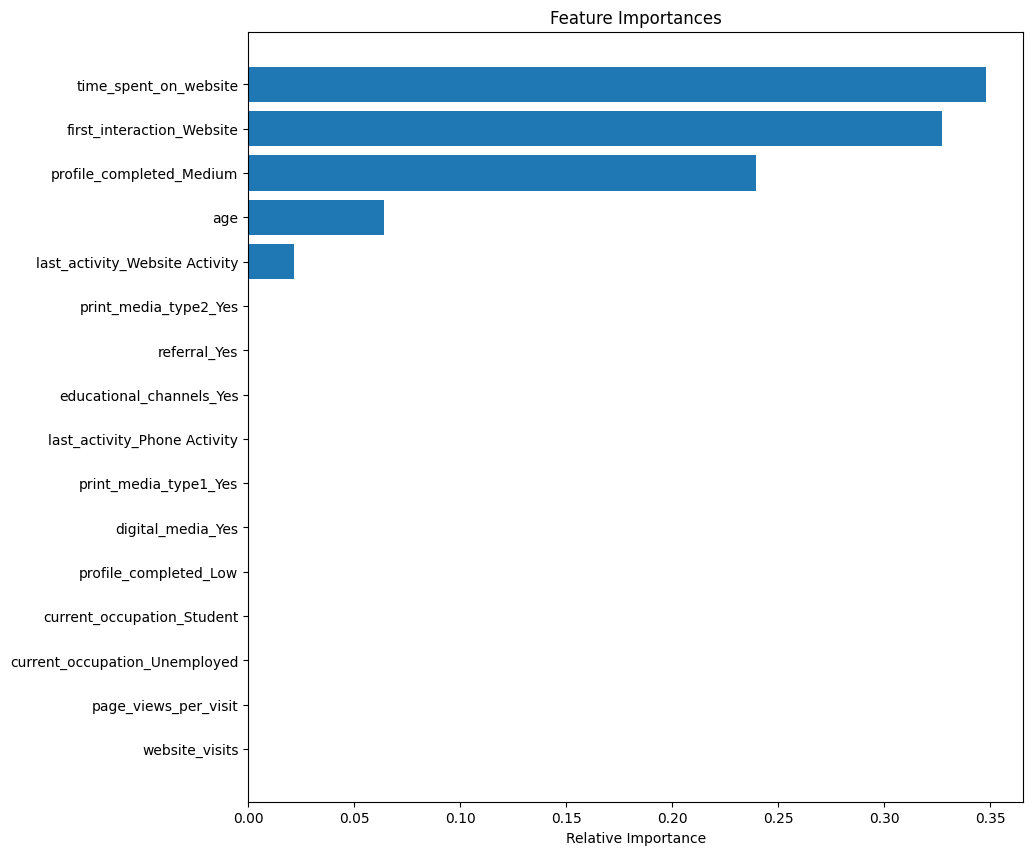

In [68]:
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Building a Random Forest model

In [69]:
rf_model = RandomForestClassifier(random_state = 1)
rf_fitted = rf_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



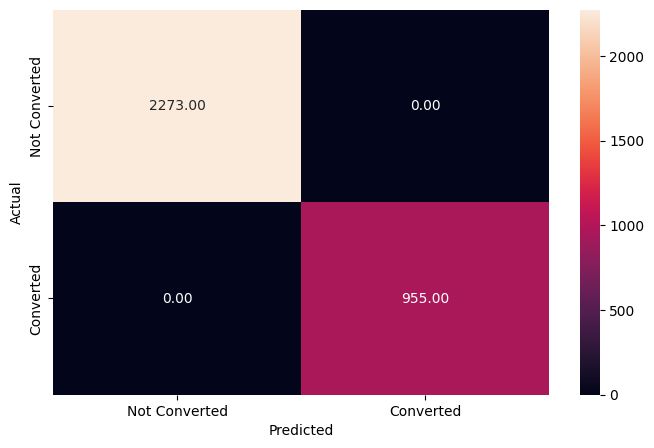

In [70]:
# Checking performance on the training data
y_pred_train3 = rf_fitted.predict(X_train)
metrics_score(y_train, y_pred_train3)

# Our model performed perfectly on the training data. Unfortunatly this isn't surprising.
# We should know by now that if we aren't more specific with our parameters the model will over fit

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



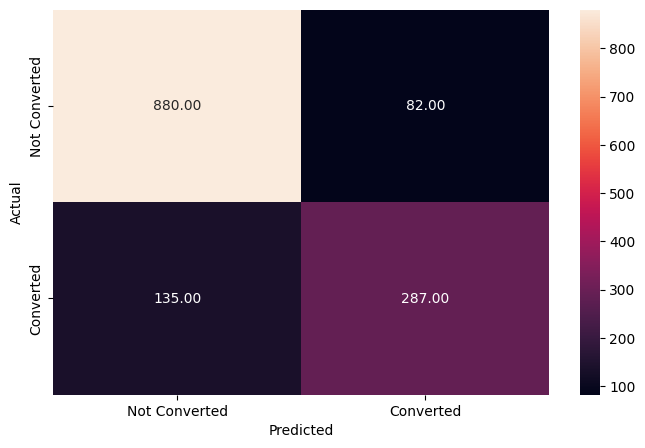

In [71]:
# Checking performance on the training data
y_pred_test3 = rf_fitted.predict(X_test)
metrics_score(y_test, y_pred_test3)

# No surprise the model perfored worse than on the training data.  A bit suprising that it performed worse than the default Decision Tree did.

## Model Performance evaluation and improvement

In [72]:
# We need to tune our parameters

# Choose the type of classifier
rf_tuned = RandomForestClassifier(random_state = 1, class_weight = {0: 0.28, 1: 0.72})
# Grid of parameters to choose from
rf_parameters = {'max_depth': np.arange(2, 7), # 3 mostly re-using our criteria from our decision tree model but with a smaller scope
                'criterion': ['entropy'], # Entropy
                'min_samples_leaf': [5, 10, 20], # 5
                'n_estimators': [70, 80, 90, 100] # Need to include n_estimators
                }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.28, 1: 0.72}, criterion='entropy',
                       max_depth=np.int64(2), min_samples_leaf=5,
                       n_estimators=80, random_state=1)

In [73]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(random_state = 1, criterion = 'entropy')
# Grid of parameters to choose from
rf_parameters = {'n_estimators': [70, 75, 80], # Need to include n_estimators for how many decision trees to have in the forest
                 'max_depth': np.arange(2, 5),
                 'min_samples_leaf': [3, 5], # 5
                 #'max_features': ['sqrt', 'log2', 0.9],
                 'max_features': ['sqrt', 0.9],
                 'max_samples':[0.8, 0.9],
                 'class_weight':['balanced',{0: 0.3, 1:0.7}]
                }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = scorer, cv = 5, verbose = 3)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=70;, score=0.628 total time=   0.2s
[CV 2/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=70;, score=0.843 total time=   0.2s
[CV 3/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=70;, score=0.806 total time=   0.2s
[CV 4/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=70;, score=0.874 total time=   0.2s
[CV 5/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=70;, score=0.644 total time=   0.2s
[CV 1/5] END class_weight=balanced, max_depth=2, max_features=sqrt, max_samples=0.8, min_samples_leaf=3, n_estimators=75;, score=0.628 total time=   0.2s
[CV 2/5] END 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=np.int64(3), max_features=0.9, max_samples=0.9,
                       min_samples_leaf=3, n_estimators=75, random_state=1)

In [74]:
grid_obj.best_params_

{'class_weight': 'balanced',
 'max_depth': np.int64(3),
 'max_features': 0.9,
 'max_samples': 0.9,
 'min_samples_leaf': 3,
 'n_estimators': 75}

              precision    recall  f1-score   support

           0       0.95      0.75      0.83      2273
           1       0.60      0.90      0.72       955

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.78      3228
weighted avg       0.85      0.79      0.80      3228



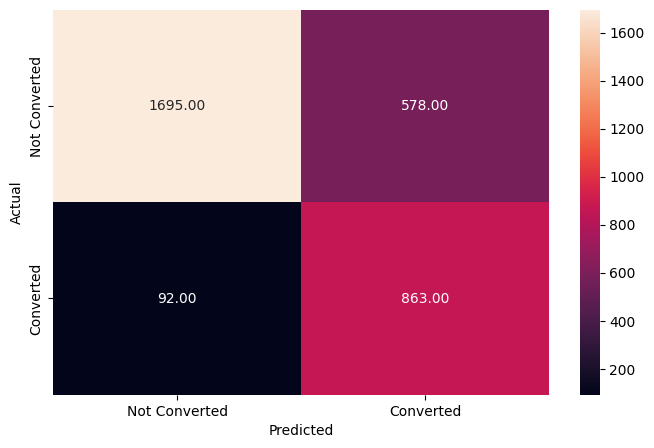

In [75]:
# Checking performance on the training data
# This is pretty good, while it's not perfect at least we're hopefully not overfitting anymore
y_pred_train4 = rf_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



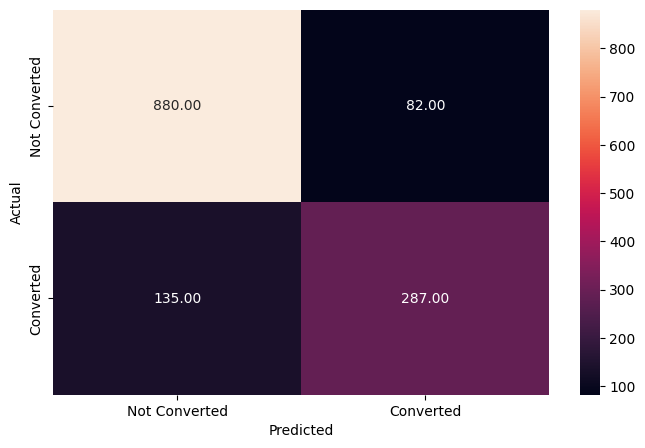

In [76]:
# Checking performance on the training data
# While it appears we've improved some of the overfitting of the model the predictive power of the random forest model on the test data has not improved with hyper paramter tuning.
y_pred_test4 = rf_fitted.predict(X_test)
metrics_score(y_test, y_pred_test4)

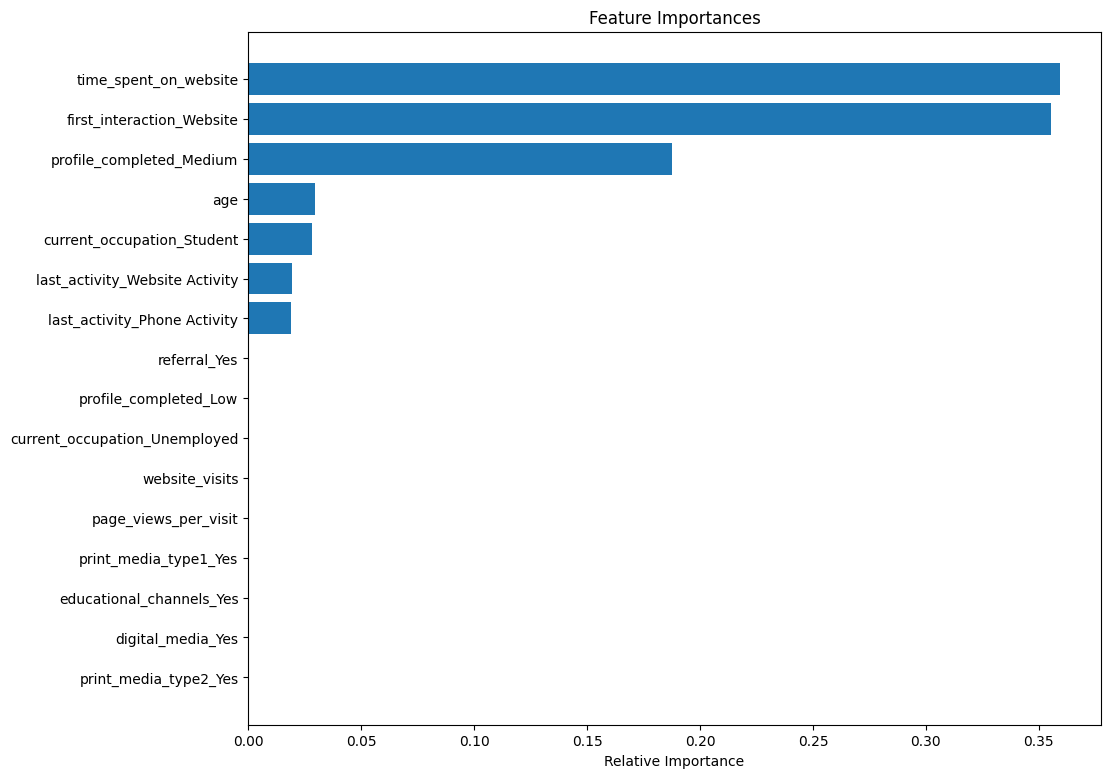

In [77]:
# Our Key features are largely the same from the decision tree model with the addition of current_occupation
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (11, 9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

In this situation I reccomend that we use the decision tree model for our prediction of potential leads to follow up on.  In most situations one would expect a random forest model to perform better but with our data set there may not be enough relvent features for the random forest trees to split on effectively.

Our best performance of the RF model is retaining 90% of the features.  Usually you would want to use 'sqrt' or 'log' which would be 4 in this data set but because so many of them are irrelevent to the actual prediction it's mostly just noise.

A decision tree may perform better because it is less sensitive to the noise in small datasets, especially if it is properly pruned to avoid overfitting.

For business insights I would reccomend catering more to the professionals and unemployed markets.  They have a higher conversion rate than students.  You can do this by focusing your advertising of the program to channels they are more likely to engage with or by adjusting the program in ways that work with their schedules better.  (Conversely you could do the same to try to attract more students to your program but if that would require a large restructuring it may not be worth the it)